# 🏆  The Fitness Tracker


### 🎯 Core Objective
To develop a robust **Fitness Tracking System** that effectively uses fundamental **Data Structures and Algorithms** to manage and analyze user progress.

### 1. Problem Statement & Technology Stack

#### The Challenge
Modern fitness tracking requires not just data collection, but intelligent, efficient management of that data. Users need fast lookups, reliable history, and a quick way to correct mistakes.

#### Technical Scope
Our solution addresses these needs by implementing specific data structures:
1.  **Array/List:** For storing chronological daily records.
2.  **Stack:** For implementing the indispensable workout **Undo** feature.
3.  **Binary Search:** For achieving lightning-fast progress lookups by date.
4.  **Graphs:** For visualizing health trends and progress over time.

#### 🛠️ Technology Stack
* **Language:** Python 3.x
* **Visualization Library:** Matplotlib

## 0. 🛠️ Project Setup, Imports, and Data Structures

In [1]:
import matplotlib.pyplot as plt
import datetime
import random

In [2]:
# --- Global Data Structures ---
# 1. Main Array/List: Stores all fitness records (must be sorted by date)
daily_records = []
# 2. Stack: Stores the last action for the undo feature (LIFO)
undo_stack = []

# --- Data Model (Dictionary Structure) ---
def create_daily_record(date_str, duration_minutes, calories_burned):
    """Defines the data model for a single day's fitness record."""
    return {
        'date': date_str,  # e.g., '2025-10-20'
        'duration_minutes': duration_minutes,
        'calories_burned': calories_burned
    }

print("✅ System initialized. Global data structures are ready.")

✅ System initialized. Global data structures are ready.


### 1. ⚙️ Utility Functions: Robust User Input

In [3]:
# Building the Array (Daily Records)
# 1. Utility Function for Robust User Input

def get_valid_input(prompt, data_type=int):
    """
    Prompts the user for input and ensures the input is of the correct data type (int/float).
    Uses a try-except block to handle non-numeric input gracefully.
    """
    while True:
        try:
            # The input() function pauses the program and waits for the user to type
            user_input = input(prompt)
            
            # Convert the input string to the required type
            if data_type == int:
                return int(user_input)
            elif data_type == float:
                return float(user_input)
            else:
                return user_input # For strings (like date)
        
        except ValueError:
            print("❌ Invalid Input! Please enter a valid number.")

def get_date_input():
    return input("📅 Enter the workout date (YYYY-MM-DD, e.g., 2025-11-01): ")

### 2. 💾 Array Management: Add Record

In [4]:
# 2. Array Management: Add Record

def add_record(date_str, duration, calories):
    """
    Adds a new record to the Array and ensures the list remains sorted by Date.
    """
    new_record = create_daily_record(date_str, duration, calories)
    
    # 1. Add record to the Array/List
    daily_records.append(new_record)
    
    # 2. Sort the Array
    # ⚠️ CRITICAL STEP: Sorting the array by date (O(n log n)) allows for fast Binary Search (O(log n)).
    daily_records.sort(key=lambda x: x['date'])
    
    return new_record # Return the record for the undo stack

### 3. 📝 Interactive Feature: Log New Workout

In [5]:
# 3. Interactive Feature: Log New Workout

def log_new_workout():
    """
    Guides the user through entering a new daily record using safe input functions.
    """
    print("\n--- ✍️ Log New Workout ---")
    
    # 1. Get Date
    workout_date = get_date_input()

    # 2. Get Duration (Integer)
    duration = get_valid_input("⏱️ Enter workout duration in minutes: ", data_type=int)
    
    # 3. Get Calories (Integer)
    calories = get_valid_input("🔥 Enter calories burned: ", data_type=int)
    
    # --- Data Processing ---
    new_record = add_record(workout_date, duration, calories)
    push_to_undo_stack(new_record) # Push the new record to the Stack
    
    print(f"\n✅ Workout for {workout_date} saved and ready for undo!")
    print(f"Current Total Records: {len(daily_records)}")

### 4. ⏪ Feature: Stack for Workout Undo

In [6]:
# 4. Feature: Workout Undo using STACK

def push_to_undo_stack(record):
    """Pushes a record (or the action details) onto the undo stack."""
    undo_stack.append(record)
    print(f"   [Stack] Pushed {record['date']}. Stack size: {len(undo_stack)}")

def pop_from_undo_stack():
    """Pops the last record from the undo stack and performs the undo action."""
    if not undo_stack:
        print("\n❌ Undo stack is empty. Nothing to undo.")
        return None
        
    last_record_to_undo = undo_stack.pop()
    
    # The 'undo' logic: remove the record from the main array
    try:
        daily_records.remove(last_record_to_undo)
        print(f"\n⏪ UNDO SUCCESSFUL: Removed record for {last_record_to_undo['date']} from daily records.")
    except ValueError:
        print(f"\n⚠️ WARNING: Record for {last_record_to_undo['date']} was already removed.")
        
    return last_record_to_undo

# --- Demonstration Run ---
print("\n--- Running Undo Demonstration ---")


--- Running Undo Demonstration ---


In [7]:
pop_from_undo_stack()


❌ Undo stack is empty. Nothing to undo.


### 5. 🔍 Feature: Binary Search for Progress Lookup

In [8]:
# 5. Feature: Progress Lookup using BINARY SEARCH

def binary_search_by_date(records, target_date):
    """
    Performs a high-efficiency search for a record by date.
    Pre-condition: 'records' MUST be sorted by date.
    Complexity: O(log n)
    """
    low = 0
    high = len(records) - 1

    while low <= high:
        mid = (low + high) // 2
        
        current_date = records[mid]['date']
        
        if current_date == target_date:
            return records[mid]  # Found!
        elif current_date < target_date:
            low = mid + 1  # Target date is later, search the right half
        else:
            high = mid - 1 # Target date is earlier, search the left half
            
    return None # Not found

def lookup_progress_interactive():
    """Prompts the user for a date and displays the results."""
    print("\n--- 🔍 Progress Lookup (Binary Search) ---")
    
    # Input Instruction: Enter the exact date you want to look up (e.g., 2025-10-25)
    target_date = input("🎯 Enter the date to search (YYYY-MM-DD): ")
    
    result = binary_search_by_date(daily_records, target_date)
    
    if result:
        print(f"\n✅ Record Found for {target_date}:")
        print(f"   Duration: {result['duration_minutes']} mins")
        print(f"   Calories Burned: {result['calories_burned']} kcal")
    else:
        print(f"\n❓ Record not found for {target_date}. Check the date format.")

### 6. 📈 Feature: Health Trend Graphs (Visualization)

In [9]:
# 6. Feature: Health Trend Graphs (Visualization)

def generate_health_trend_graph(records, metric_key, title):
    """Generates a line graph for a specified metric over time."""
    if not records:
        print("\nCannot generate graph: No records available.")
        return
        
    # Extract data points
    dates = [r['date'] for r in records]
    metrics = [r[metric_key] for r in records]
    
    # Matplotlib plotting commands
    plt.figure(figsize=(10, 5))
    plt.plot(dates, metrics, marker='o', linestyle='-', color='teal', linewidth=2)
    
    plt.title(f'{title} Trend Over Time', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel(title)
    
    # Format X-axis for better date visibility
    n = len(dates)
    if n > 7:
        plt.xticks(dates[::n//7 + 1], rotation=45, ha='right')
    else:
        plt.xticks(rotation=45, ha='right')
        
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def display_all_graphs():
    """Calls the graph function for the main metrics."""
    print("\n--- 📊 Displaying Health Trend Graphs ---")
    generate_health_trend_graph(daily_records, 'calories_burned', 'Daily Calories Burned (kcal)')
    generate_health_trend_graph(daily_records, 'duration_minutes', 'Daily Workout Duration (minutes)')

### 7. 🚀 Final Project Menu

In [10]:
# 7. Final Project Menu

def main_menu():
    """The main loop for the Fitness Tracker application."""
    # Load 5 days of initial dummy data for demonstration purposes
    start_date = datetime.date(2025, 10, 20)
    for i in range(5):
        date_str = (start_date + datetime.timedelta(days=i)).strftime('%Y-%m-%d')
        duration = random.randint(30, 90)
        calories = duration * random.randint(6, 10) 
        add_record(date_str, duration, calories)
    print(f"Loaded {len(daily_records)} initial records for demonstration.")
    print("Starting main application...")
    
    while True:
        print("\n=============================================")
        print("     💪 Fitness Tracker CLI - Group 42      ")
        print("=============================================")
        print("1. ✍️ Log New Workout")
        print("2. 🔍 Look Up Progress by Date (Binary Search)")
        print("3. ⏪ Undo Last Workout Entry (Stack)")
        print("4. 📊 View Health Trend Graphs")
        print("5. 🚪 Exit")
        
        # Input Instruction: Enter the number corresponding to the action you want to take (1-5)
        choice = get_valid_input("Enter your choice (1-5): ", data_type=int)
        
        if choice == 1:
            log_new_workout()
        elif choice == 2:
            lookup_progress_interactive()
        elif choice == 3:
            pop_from_undo_stack()
        elif choice == 4:
            display_all_graphs()
        elif choice == 5:
            print("👋 Thank you for using the Fitness Tracker. Goodbye!")
            break
        else:
            print("⚠️ Invalid choice. Please enter a number between 1 and 5.")

### 🚀 Conclusion and Future Scope

#### ✅ Summary of Achievements
* Successfully implemented **Array** (List) for daily record storage.
* Developed a reliable **Stack** implementation for the **Workout Undo** feature.
* Integrated **Binary Search** to ensure fast, scalable progress lookup ($O(\log n)$).
* Utilized **Matplotlib** to generate insightful health trend visualizations.

#### 🔮 Future Enhancements
* **Hash Maps:** Use a Dictionary/Hash Map for user authentication and quick profile access ($O(1)$).
* **Queues:** Implement a **Queue** for a "Future Workout Plan" feature.
* **GUI:** Transition from a command-line interface to a Graphical User Interface (GUI) using Tkinter or PyQt.

Loaded 5 initial records for demonstration.
Starting main application...

     💪 Fitness Tracker CLI - Group 42      
1. ✍️ Log New Workout
2. 🔍 Look Up Progress by Date (Binary Search)
3. ⏪ Undo Last Workout Entry (Stack)
4. 📊 View Health Trend Graphs
5. 🚪 Exit


Enter your choice (1-5):  1



--- ✍️ Log New Workout ---


📅 Enter the workout date (YYYY-MM-DD, e.g., 2025-11-01):  2025-10-31
⏱️ Enter workout duration in minutes:  30
🔥 Enter calories burned:  10


   [Stack] Pushed 2025-10-31. Stack size: 1

✅ Workout for 2025-10-31 saved and ready for undo!
Current Total Records: 6

     💪 Fitness Tracker CLI - Group 42      
1. ✍️ Log New Workout
2. 🔍 Look Up Progress by Date (Binary Search)
3. ⏪ Undo Last Workout Entry (Stack)
4. 📊 View Health Trend Graphs
5. 🚪 Exit


Enter your choice (1-5):  3



⏪ UNDO SUCCESSFUL: Removed record for 2025-10-31 from daily records.

     💪 Fitness Tracker CLI - Group 42      
1. ✍️ Log New Workout
2. 🔍 Look Up Progress by Date (Binary Search)
3. ⏪ Undo Last Workout Entry (Stack)
4. 📊 View Health Trend Graphs
5. 🚪 Exit


Enter your choice (1-5):  4



--- 📊 Displaying Health Trend Graphs ---


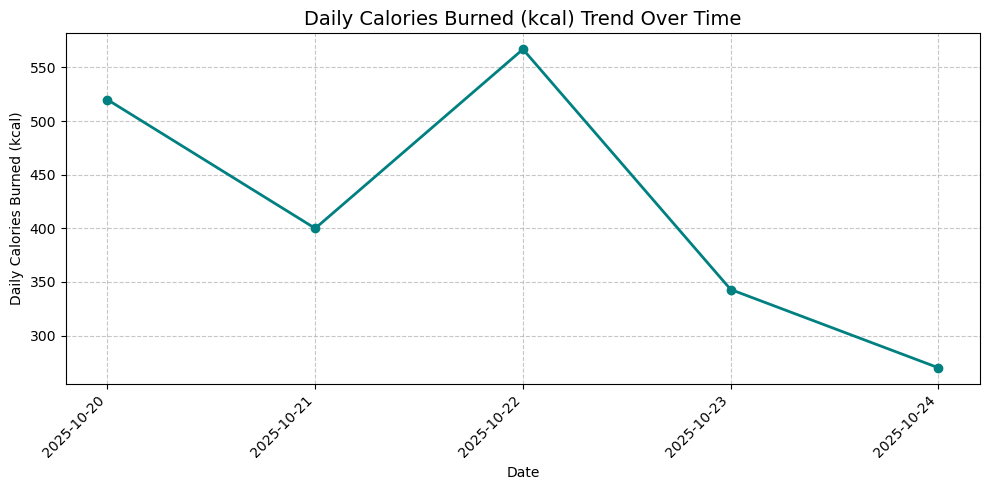

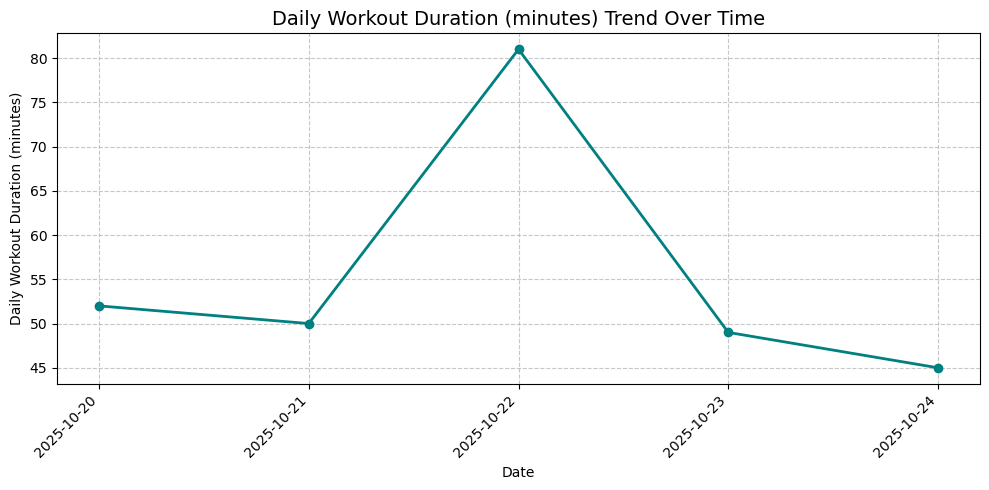


     💪 Fitness Tracker CLI - Group 42      
1. ✍️ Log New Workout
2. 🔍 Look Up Progress by Date (Binary Search)
3. ⏪ Undo Last Workout Entry (Stack)
4. 📊 View Health Trend Graphs
5. 🚪 Exit


Enter your choice (1-5):  5


👋 Thank you for using the Fitness Tracker. Goodbye!


In [11]:
main_menu()